<a href="https://colab.research.google.com/github/BodyHabib/shape-manipulation2D-openGL/blob/master/Car_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#reead csv file and print dataset
car = pd.read_csv("/content/Abdullrahman-Data.csv")
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,45813251,549,1249,TOYOTA,Camry,2017.0,Sedan,Yes,Petrol,2.5,60666 km,4.0,Automatic,Front,4-May,Left wheel,Grey,12
1003,45797449,10986,1047,HYUNDAI,Elantra,2007.0,Sedan,Yes,Petrol,1.6,129080 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
1004,45770268,6272,-,OPEL,Astra,1998.0,Goods wagon,No,Diesel,2.0 Turbo,300000 km,4.0,Manual,Front,4-May,Left wheel,Carnelian red,4
1005,45635109,941,642,VOLKSWAGEN,Jetta,2012.0,Sedan,Yes,Diesel,2,203440 km,4.0,Automatic,Front,4-May,Left wheel,Black,12


In [44]:
# print information of dataset such as (columns name, number of non-null count, data type of columns)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1007 non-null   int64  
 1   Price             1007 non-null   int64  
 2   Levy              1007 non-null   object 
 3   Manufacturer      1007 non-null   object 
 4   Model             1007 non-null   object 
 5   Prod. year        997 non-null    float64
 6   Category          1007 non-null   object 
 7   Leather interior  1007 non-null   object 
 8   Fuel type         1007 non-null   object 
 9   Engine volume     1007 non-null   object 
 10  Mileage           1007 non-null   object 
 11  Cylinders         1006 non-null   float64
 12  Gear box type     1007 non-null   object 
 13  Drive wheels      1007 non-null   object 
 14  Doors             1007 non-null   object 
 15  Wheel             1007 non-null   object 
 16  Color             1007 non-null   object 


In [45]:
#print statistics of dataset such as (count, mean, standard deviasion, q1, q2, q3, min, max)
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.007000e+03,1007.000000,997.000000,1006.000000,1007.000000
mean,4.557952e+07,16582.072493,2010.767302,4.539761,6.516385
std,8.632907e+05,16521.819517,5.794161,1.258566,4.295668
min,3.211632e+07,3.000000,1977.000000,1.000000,0.000000
25%,4.571132e+07,5331.000000,2009.000000,4.000000,4.000000
50%,4.577210e+07,12570.000000,2012.000000,4.000000,6.000000
75%,4.580220e+07,21305.500000,2014.000000,4.000000,12.000000
max,4.581665e+07,119172.000000,2020.000000,16.000000,16.000000


In [46]:
#print columns name of dataset
car.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [47]:
#print number of columns and rows
car.shape

(1007, 18)

In [48]:
#detect number  and print missing values 
car.isnull().sum(axis=0)

ID                   0
Price                0
Levy                 0
Manufacturer         0
Model                0
Prod. year          10
Category             0
Leather interior     0
Fuel type            0
Engine volume        0
Mileage              0
Cylinders            1
Gear box type        0
Drive wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
dtype: int64

In [49]:
#replace missing values by using (fillna) 
new_dataset = car.fillna(method='ffill')
new_dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,45813251,549,1249,TOYOTA,Camry,2017.0,Sedan,Yes,Petrol,2.5,60666 km,4.0,Automatic,Front,4-May,Left wheel,Grey,12
1003,45797449,10986,1047,HYUNDAI,Elantra,2007.0,Sedan,Yes,Petrol,1.6,129080 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
1004,45770268,6272,-,OPEL,Astra,1998.0,Goods wagon,No,Diesel,2.0 Turbo,300000 km,4.0,Manual,Front,4-May,Left wheel,Carnelian red,4
1005,45635109,941,642,VOLKSWAGEN,Jetta,2012.0,Sedan,Yes,Diesel,2,203440 km,4.0,Automatic,Front,4-May,Left wheel,Black,12


In [50]:
#in this step we sure that we have not missing values
new_dataset.isnull().sum(axis=0)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [51]:
#we covert the data type of Leather interior from string(boolen) to integeer(boolen)
new_dataset=new_dataset.replace(to_replace=['Yes','No'],value=[1,0])
new_dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010.0,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011.0,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006.0,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011.0,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014.0,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,45813251,549,1249,TOYOTA,Camry,2017.0,Sedan,1,Petrol,2.5,60666 km,4.0,Automatic,Front,4-May,Left wheel,Grey,12
1003,45797449,10986,1047,HYUNDAI,Elantra,2007.0,Sedan,1,Petrol,1.6,129080 km,4.0,Automatic,Front,4-May,Left wheel,Silver,4
1004,45770268,6272,-,OPEL,Astra,1998.0,Goods wagon,0,Diesel,2.0 Turbo,300000 km,4.0,Manual,Front,4-May,Left wheel,Carnelian red,4
1005,45635109,941,642,VOLKSWAGEN,Jetta,2012.0,Sedan,1,Diesel,2,203440 km,4.0,Automatic,Front,4-May,Left wheel,Black,12


<ipython-input-61-96732d439bda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=car.Price, hist=False)


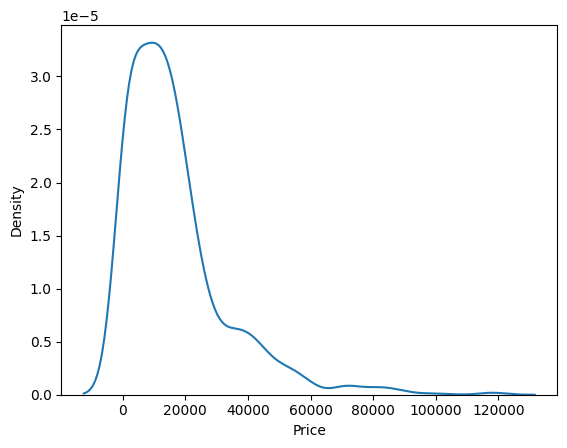

In [61]:
#display density of price in distplot 
sns.distplot(a=car.Price, hist=False)
plt.show()

<ipython-input-63-d1114762af8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=car.Price, kde=False)


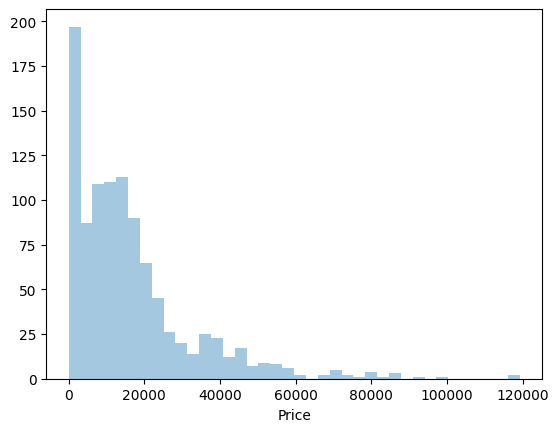

In [63]:
 #display density of price in histogram
 sns.distplot(a=car.Price, kde=False)
plt.show()

<ipython-input-65-6bbfdb4d5a3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=car.corr()


<Axes: >

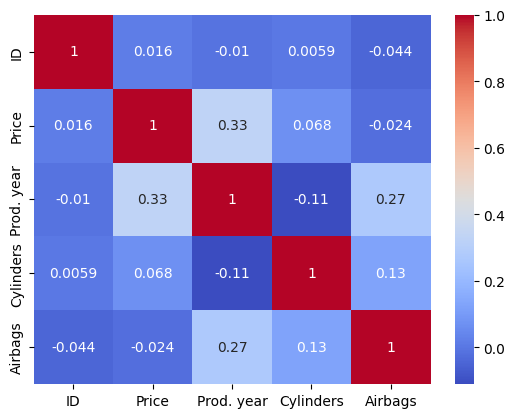

In [65]:
#display correlation of dataset
correlation=car.corr()
sns.heatmap(correlation , annot=True ,cmap='coolwarm')